> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

This is a dataset of movies. It contains various details about movies for our analysis. I want to analyse the given dataset to answer questions about trends and their associations to be explored here are:
    1. Popularity over the years
    2. Revenue over the years
    3. Runtime over the years


In [189]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [85]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_data = pd.read_csv('tmdb_movies_data.csv')
# Shows full summary of tmdb movie dataset and columns with missing values.
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [86]:
# Dimensions of dataset
movie_data.shape

(10866, 21)

In [87]:
# Datatypes of columns
movie_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [88]:
# Unique values of columns
movie_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [89]:
# Count of missing values in dataset
movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [90]:
# Duplicate rows in dataset
sum(movie_data.duplicated(keep=False))
#movie_data[movie_data.duplicated(['id'], keep=False)]

2

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [91]:
# Drop the duplicates in dataset
movie_data.drop_duplicates(inplace=True)

In [92]:
# Drop the columns we are not going to use for our exploration
columns = ['imdb_id', 'homepage', 'tagline','keywords','overview']
movie_data.drop(columns, inplace=True, axis=1)


In [93]:
# Creating new column return_on_investment = (revenue-budget)/budget, 
# replace Nan with 0 as in some rows both budget and reveneue is 0 ROI is coming as Nan
movie_data['return_on_investment'] = pd.Series((movie_data['revenue'] - movie_data['budget'])/movie_data['budget'], index = movie_data.index)
movie_data['return_on_investment'].fillna(0, inplace=True)

In [95]:
# Creating new coulmn if movie was profitable
movie_data['earned_profit'] = np.where(movie_data['return_on_investment'] > 0 , 1, 0) 

In [96]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# release_date column should have their datatype to be datetime instead of string.
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])


In [97]:
# check for nulls after removing unnecessary columns and adding new ones
movie_data.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
return_on_investment       0
earned_profit              0
dtype: int64

In [98]:
# Filled all missing values with 0
movie_data['genres'].fillna('',inplace=True)
movie_data.fillna(0,inplace=True)

In [99]:
# Shows first few rows of dataset
movie_data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,return_on_investment,earned_profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,9.090192,1
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,1.522909,1
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.683984,1
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,9.340891,1
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,6.927628,1


In [83]:
# Shows last few rows of dataset
movie_data.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,return_on_investment,earned_profit
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000,0.0,0.0,0
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000,0.0,0.0,0
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000,0.0,0.0,0
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000,0.0,0.0,0
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,127642.279154,0.0,-1.0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Question 1: 
First few questions came in my mind : whcih are the top five most popular movies, which are the top five most voted movies and whcih are the top five highest voted movies.

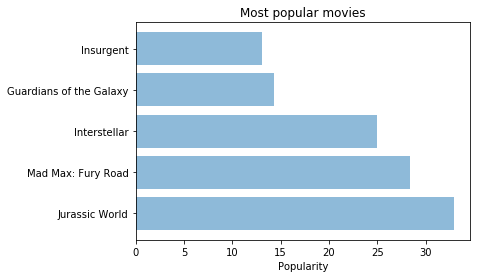

In [142]:
#Most poular movies
top_5_popular_movies = movie_data.sort_values(['popularity'], ascending=[False])[:5]

movie_names = top_5_popular_movies['original_title']
y_pos = np.arange(len(movie_names))
popularity = top_5_popular_movies['popularity']
 
plt.barh(y_pos, popularity, align='center', alpha=0.5)
plt.yticks(y_pos, movie_names)
plt.xlabel('Popularity')
plt.title('Most popular movies')
 
plt.show()


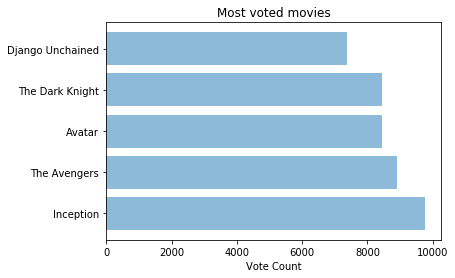

In [143]:
# top 5 most voted movies
top_5_voted_movies =  movie_data.sort_values(['vote_count'], ascending=[False])[:5]

movie_names = top_5_voted_movies['original_title']
y_pos = np.arange(len(movie_names))
no_of_votes = top_5_voted_movies['vote_count']
 
plt.barh(y_pos, no_of_votes, align='center', alpha=0.5)
plt.yticks(y_pos, movie_names)
plt.xlabel('Vote Count')
plt.title('Most voted movies')
 
plt.show()

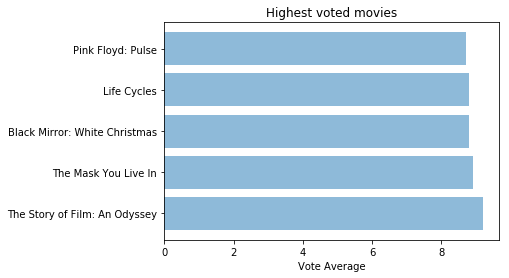

In [166]:
# top 5 highest voted movies, we can break the tie on vote_average by vote_count
highest_voted_movies = movie_data.sort_values(['vote_average', 'vote_count'], ascending=[False,False])[:5]


movie_names = highest_voted_movies['original_title']
y_pos = np.arange(len(movie_names))
average_votes = highest_voted_movies['vote_average']
 
plt.barh(y_pos, average_votes, align='center', alpha=0.5)
plt.yticks(y_pos, movie_names)
plt.xlabel('Vote Average')
plt.title('Highest voted movies')
 
plt.show()

### Question 2:
Using the data we have we can also find distribution of movies released by year.


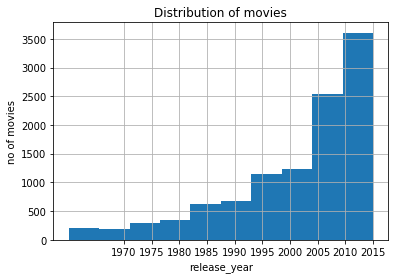

In [145]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Plot distribution of movies
plt.hist(movie_data['release_year'])
plt.title('Distribution of movies')
plt.xlabel('release_year')
plt.ylabel('no of movies')
plt.xticks(range(1970,2020, 5))
plt.grid(True)
plt.show()

The shape of above histogram is left skewed, as the left tail is much longer than right tail. The peak period of movie release is between 2009 to 2015. With technology advancing and more no of people watching movies in theaters or on television now as days it seems obvious that more and more movies released in recent years and the left skewed distribution is not surprising. One can even predict that the no of movies coming in subsequent years will only go up.

### Question 3: 
Next question comes in my mind **Which genre did most movies belonged to?**

In [116]:
## function for counting the frequency of unique words in a column
def word_count(df,col):
    temp=""
    for i in df[col]:
        temp=temp+'|'+i
    
    keywords=set(temp.split('|'))
    if '' in list(keywords):
        keywords.remove('')
    liste=list(keywords)
    dict_key={}
    keywords=[]
    
    lt=temp.split("|")
    for i in liste:
        j=0
        for w in lt:
            if w==i:
                j=j+1
        keywords.append([i,j])
    
    keywords=sorted(keywords,key=lambda x:x[1],reverse=True)
    return keywords

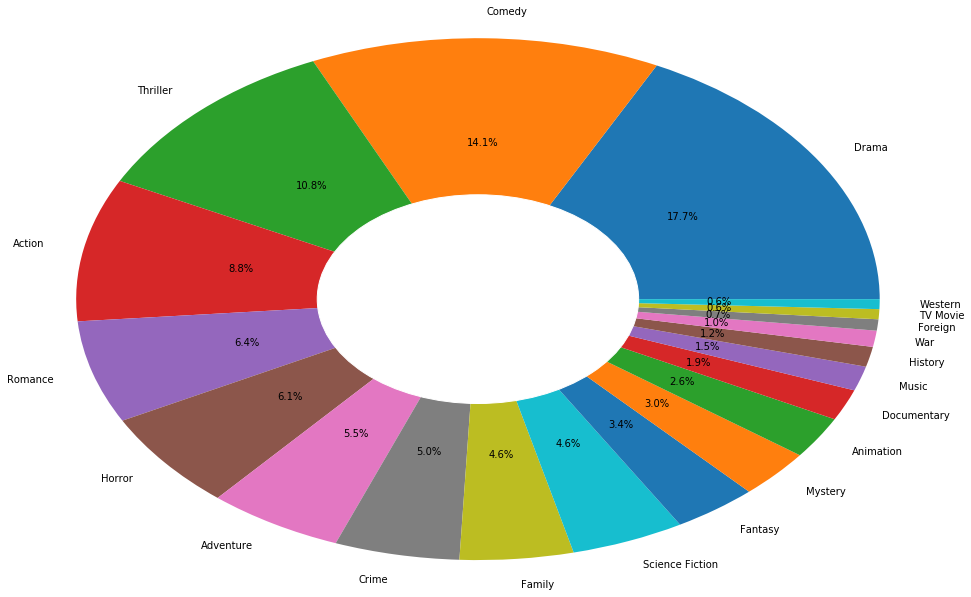

In [131]:
#create pie chart for movie percentages by generes
genre_count = np.array(word_count(movie_data,'genres'))
my_circle=plt.Circle( (0,0), 1.2, color='white')
plt.pie( genre_count[...,1] , labels=genre_count[...,0],autopct='%1.1f%%', radius = 3)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Accoring to pie chart above it seems Drama, Comedy and Thriller are the hotest genere for movies. Almost 43% of movies released under these three genre. 

### Question 4:
It will be great if we can find **which genre is most popular among people.**


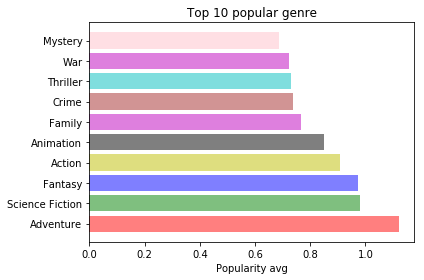

In [249]:
liste_genres = set()
for s in movie_data['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')


df_reduced = movie_data[['original_title','popularity','vote_count', 'vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

for genre in liste_genres:
    df_reduced[genre] = movie_data['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
    
new_data_frame = pd.DataFrame(liste_genres)

#Mean popularity
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['popularity'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

new_data_frame['mean_popularity']=newArray2

most_popular_genres= new_data_frame.sort_values(['mean_popularity'], ascending=[False])[:10]

genres = most_popular_genres[new_data_frame.columns[0]]
y_pos = np.arange(len(genres))
mean_popularity = most_popular_genres['mean_popularity']
    
plt.barh(y_pos, mean_popularity, align='center', alpha=0.5, color=['r', 'g', 'b', 'y','k', 'm', 'brown', 'c', 'm','pink'])
plt.yticks(y_pos, genres)
plt.xlabel('Popularity avg')
plt.title('Top 10 popular genre')

plt.tight_layout() 
plt.show()


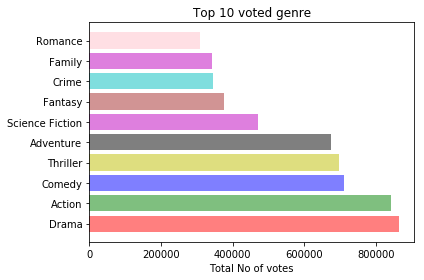

In [253]:
#Most voted genre
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['vote_count'].sum())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

new_data_frame['total_vote_count']=newArray2

most_voted_genre= new_data_frame.sort_values(['total_vote_count'], ascending=[False])[:10]

genres = most_voted_genre[new_data_frame.columns[0]]
y_pos = np.arange(len(genres))
total_vote_count = most_voted_genre['total_vote_count']
    
plt.barh(y_pos, total_vote_count, align='center', alpha=0.5, color=['r', 'g', 'b', 'y','k', 'm', 'brown', 'c', 'm','pink'])
plt.yticks(y_pos, genres)
plt.xlabel('Total No of votes')
plt.title('Top 10 voted genre')

plt.tight_layout() 
plt.show()


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!


From above all trends, the features of the movie are working idependently. Through the years, the movie is dependent on budget, revenue and ratings from which we can decide which movie either is blockbuster or flop.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0